# **Collect Data**

## 1. Import Libraries

In [1]:
!pip install gdown
import gdown
import zipfile
import shutil
import os

In [2]:
# ID file kaggle.json dari link Google Drive
file_id = "11y9rX8FPN-fBWw0q3nzJdUGuq4ugXHxc"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "kaggle.json", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11y9rX8FPN-fBWw0q3nzJdUGuq4ugXHxc
To: /content/kaggle.json
100%|██████████| 66.0/66.0 [00:00<00:00, 79.5kB/s]


'kaggle.json'

In [3]:
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.copy("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

## 2. Definisi Fungsi untuk *Load Data* dari Kaggle

In [4]:
def download_and_extract(dataset_name, zip_filename, extract_to):
    print(f"\n📂 Downloading {dataset_name}...")
    os.system(f"kaggle datasets download -d {dataset_name}")
    print(f"🗁 Extracting {zip_filename}...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [5]:
def count_files(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

In [6]:
def move_and_rename_files(root_dirs, category_map, base_data_dir='data', single_level=False):
    for src_cat, dst_cat in category_map.items():
        target_dir = os.path.join(base_data_dir, dst_cat)
        os.makedirs(target_dir, exist_ok=True)

        for split_name, root_path in root_dirs.items():
            source_dir = os.path.join(root_path, src_cat) if src_cat else root_path
            if not os.path.exists(source_dir):
                continue
            for i, filename in enumerate(os.listdir(source_dir)):
                src_file = os.path.join(source_dir, filename)
                if os.path.isfile(src_file):
                    prefix = split_name if not single_level else dst_cat.replace(" ", "_")
                    new_filename = f"{prefix}_{i}_{filename}" if prefix else f"{i}_{filename}"
                    dst_file = os.path.join(target_dir, new_filename)
                    shutil.move(src_file, dst_file)

        jumlah_file = count_files(target_dir)
        kategori_label = src_cat if src_cat else dst_cat
        print(f"📦 Semua file kategori '{kategori_label}' telah dipindahkan ke '{dst_cat}'")
        print(f"📸 Jumlah file di '{dst_cat}': {jumlah_file}\n")

In [7]:
def move_files_from_list(source_dirs, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    for src in source_dirs:
        prefix = os.path.basename(src)
        for i, filename in enumerate(os.listdir(src)):
            src_file = os.path.join(src, filename)
            if os.path.isfile(src_file):
                new_filename = f"{prefix}_{i}_{filename}"
                dst_file = os.path.join(target_dir, new_filename)
                shutil.move(src_file, dst_file)
    jumlah_file = count_files(target_dir)
    print(f"📦 Semua file dari {len(source_dirs)} folder telah dipindahkan ke '{target_dir}'")
    print(f"📸 Jumlah file di '{target_dir}': {jumlah_file}\n")

In [8]:
def cleanup(paths):
    for path in paths:
        if os.path.isfile(path):
            os.remove(path)
        elif os.path.isdir(path):
            shutil.rmtree(path, ignore_errors=True)

In [9]:
# Buat folder data
os.makedirs("data", exist_ok=True)

## 3. *Load Dataset*

### Dataset 1: garbage-classification-v2

In [10]:
download_and_extract("sumn2u/garbage-classification-v2", "garbage-classification-v2.zip", "garbage-dataset")

move_and_rename_files({"biological": "garbage-dataset/garbage-dataset"}, {"biological": "Sampah Makanan"}, single_level=True)
move_and_rename_files({"cardboard": "garbage-dataset/garbage-dataset"}, {"cardboard": "Kardus"}, single_level=True)

cleanup(['garbage-dataset', 'garbage-classification-v2.zip'])


📂 Downloading sumn2u/garbage-classification-v2...
🗁 Extracting garbage-classification-v2.zip...
📦 Semua file kategori 'biological' telah dipindahkan ke 'Sampah Makanan'
📸 Jumlah file di 'Sampah Makanan': 997

📦 Semua file kategori 'cardboard' telah dipindahkan ke 'Kardus'
📸 Jumlah file di 'Kardus': 1825



### Dataset 2: custom-waste-classification-dataset

In [11]:
download_and_extract("wasifmahmood01/custom-waste-classification-dataset", "custom-waste-classification-dataset.zip", "custom-waste-classification-dataset")

move_and_rename_files(
    {
        'train': 'custom-waste-classification-dataset/wastes/train',
        'test': 'custom-waste-classification-dataset/wastes/test'
    },
    {
        "E-waste": "Elektronik",
        "battery waste": "Baterai",
        "glass waste": "Kaca",
        "light bulbs": "Lampu",
        "metal waste": "Logam",
        "paper waste": "Kertas",
        "plastic waste": "Plastik"
    }
)

cleanup(['custom-waste-classification-dataset', 'custom-waste-classification-dataset.zip'])


📂 Downloading wasifmahmood01/custom-waste-classification-dataset...
🗁 Extracting custom-waste-classification-dataset.zip...
📦 Semua file kategori 'E-waste' telah dipindahkan ke 'Elektronik'
📸 Jumlah file di 'Elektronik': 1561

📦 Semua file kategori 'battery waste' telah dipindahkan ke 'Baterai'
📸 Jumlah file di 'Baterai': 1061

📦 Semua file kategori 'glass waste' telah dipindahkan ke 'Kaca'
📸 Jumlah file di 'Kaca': 1278

📦 Semua file kategori 'light bulbs' telah dipindahkan ke 'Lampu'
📸 Jumlah file di 'Lampu': 525

📦 Semua file kategori 'metal waste' telah dipindahkan ke 'Logam'
📸 Jumlah file di 'Logam': 1539

📦 Semua file kategori 'paper waste' telah dipindahkan ke 'Kertas'
📸 Jumlah file di 'Kertas': 1713

📦 Semua file kategori 'plastic waste' telah dipindahkan ke 'Plastik'
📸 Jumlah file di 'Plastik': 1644



### Dataset 3: robin-base

In [12]:
download_and_extract("bahiskaraananda/robin-base", "robin-base.zip", "robin-base")

move_and_rename_files(
    {
        'train': 'robin-base/train',
        'test': 'robin-base/test',
        'val': 'robin-base/val'
    },
    {
        'daun': 'Daun',
        'tekstil': 'Pakaian'
    }
)

cleanup(['robin-base', 'robin-base.zip'])


📂 Downloading bahiskaraananda/robin-base...
🗁 Extracting robin-base.zip...
📦 Semua file kategori 'daun' telah dipindahkan ke 'Daun'
📸 Jumlah file di 'Daun': 3000

📦 Semua file kategori 'tekstil' telah dipindahkan ke 'Pakaian'
📸 Jumlah file di 'Pakaian': 3000



### Dataset 4: recyclable-and-household-waste-classification

In [13]:
download_and_extract("alistairking/recyclable-and-household-waste-classification", "recyclable-and-household-waste-classification.zip", "recyclable-and-household-waste-classification-dataset")

move_files_from_list([
    "recyclable-and-household-waste-classification-dataset/images/images/styrofoam_food_containers/real_world",
    "recyclable-and-household-waste-classification-dataset/images/images/styrofoam_food_containers/default"
], "data/Sterofom")

cleanup(['recyclable-and-household-waste-classification-dataset', 'recyclable-and-household-waste-classification.zip', 'sample_data'])


📂 Downloading alistairking/recyclable-and-household-waste-classification...
🗁 Extracting recyclable-and-household-waste-classification.zip...
📦 Semua file dari 2 folder telah dipindahkan ke 'data/Sterofom'
📸 Jumlah file di 'data/Sterofom': 500



## 4. Cek Jumlah Gambar per Folder

In [14]:
root_folder = 'data'
image_exts = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

for category in os.listdir(root_folder):
    category_path = os.path.join(root_folder, category)
    if os.path.isdir(category_path):
        count = 0
        for filename in os.listdir(category_path):
            ext = os.path.splitext(filename)[1].lower()
            if ext in image_exts:
                count += 1
        print(f"📁 Folder: {category_path} - Jumlah gambar: {count}")

📁 Folder: data/Sampah Makanan - Jumlah gambar: 997
📁 Folder: data/Sterofom - Jumlah gambar: 500
📁 Folder: data/Logam - Jumlah gambar: 1539
📁 Folder: data/Baterai - Jumlah gambar: 1061
📁 Folder: data/Elektronik - Jumlah gambar: 1561
📁 Folder: data/Pakaian - Jumlah gambar: 3000
📁 Folder: data/Kardus - Jumlah gambar: 1825
📁 Folder: data/Kertas - Jumlah gambar: 1713
📁 Folder: data/Lampu - Jumlah gambar: 525
📁 Folder: data/Kaca - Jumlah gambar: 1278
📁 Folder: data/Daun - Jumlah gambar: 3000
📁 Folder: data/Plastik - Jumlah gambar: 1644


# **Pre Processing Data**

## 1. Import Libraries

In [15]:
import os
import shutil
import random
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
!pip install onnxruntime
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00


## 2. Menampilkan Preview Gambar

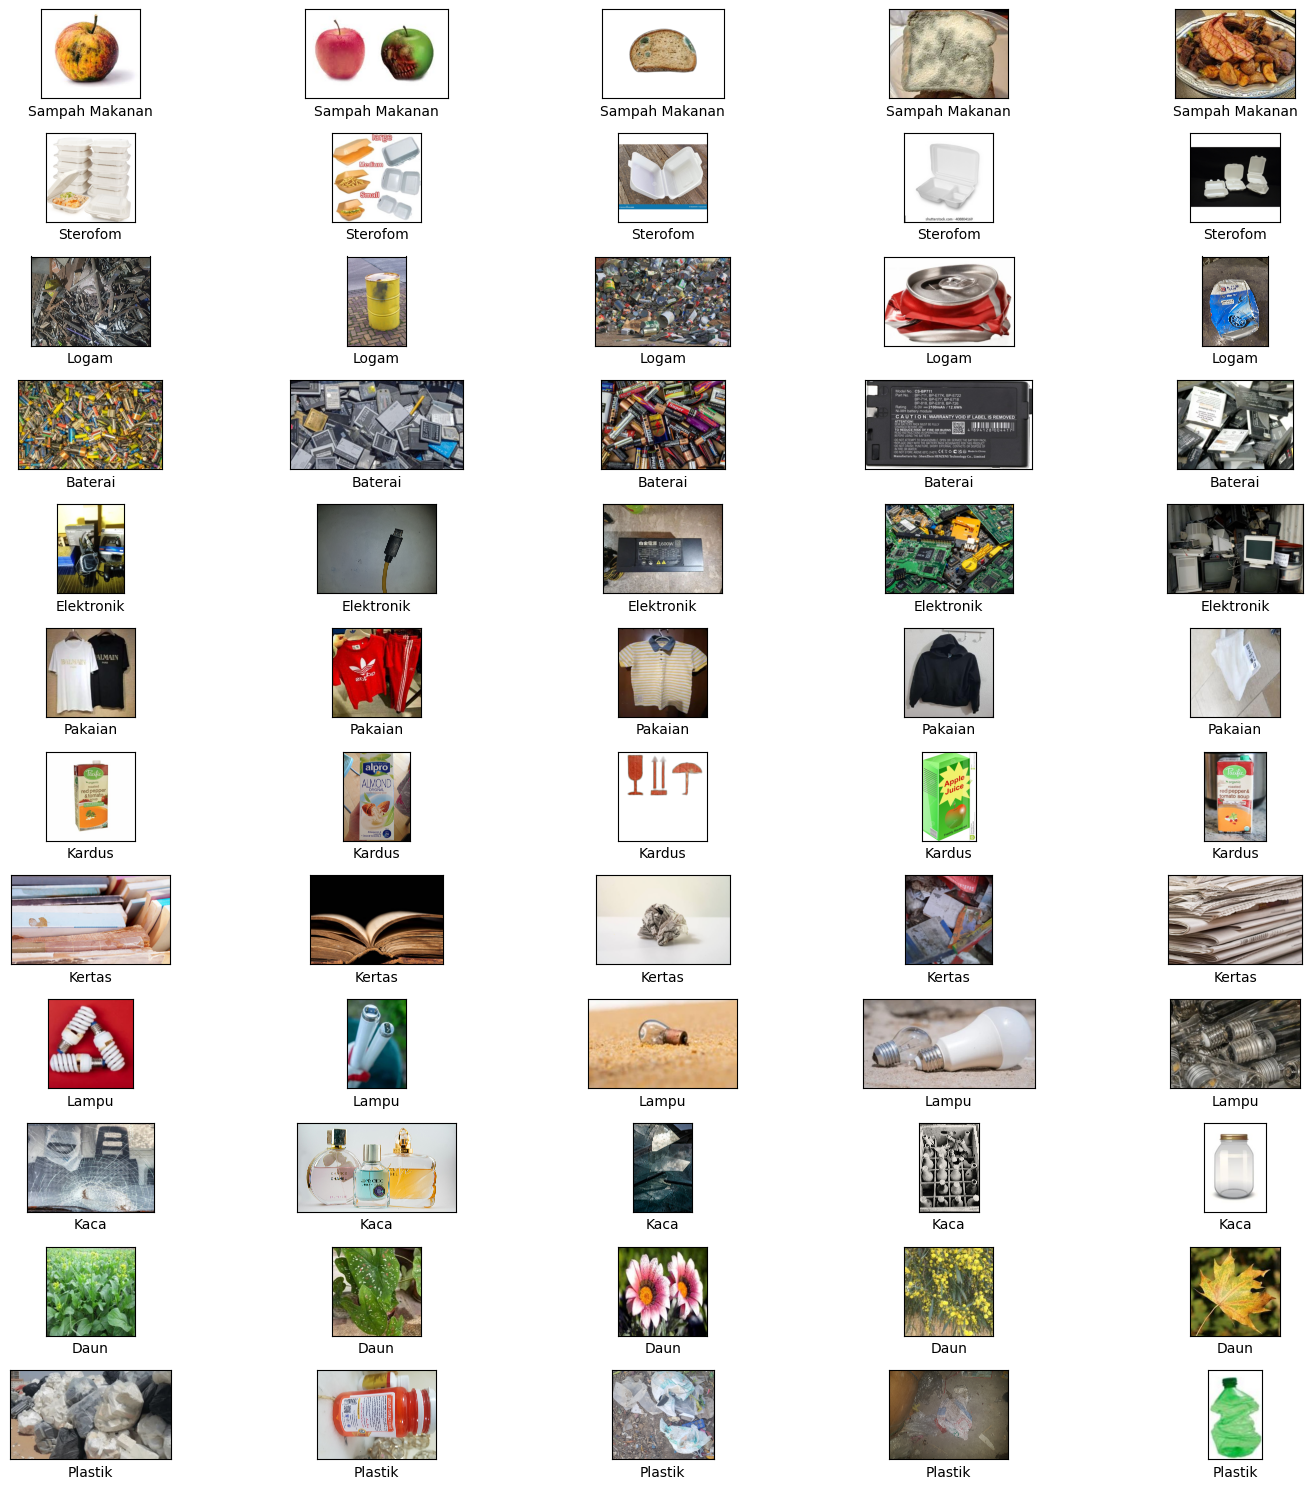

In [16]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
garbage_image = {}

# Tentukan path sumber dataset
path = "/content/data"  # Ganti dengan path ke dataset Anda
path_sub = os.path.join(path)

# Menyimpan gambar dalam kamus berdasarkan kategori
for category in os.listdir(path_sub):
    garbage_image[category] = os.listdir(os.path.join(path_sub, category))

# Menampilkan secara acak 5 gambar di bawah setiap kelas
fig, axs = plt.subplots(len(garbage_image.keys()), 5, figsize=(15, 15))

for i, category_name in enumerate(garbage_image.keys()):
    images = np.random.choice(garbage_image[category_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, category_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=category_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()

## 3. Definisi Fungsi

### Definisi Fungsi Undersampling

In [17]:
# Set random.seed = 42
random.seed(42)

# Fungsi undersample in-place (hapus file agar jumlah jadi 1500)
def undersample_inplace(category_dir, target_size=1500):
    images = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]

    if len(images) <= target_size:
        print(f"Tidak perlu undersample di {category_dir}, jumlah gambar sudah <= {target_size}")
        return

    to_delete = random.sample(images, len(images) - target_size)

    for image in to_delete:
        os.remove(os.path.join(category_dir, image))

    print(f"✅ Undersample selesai untuk {category_dir}. {len(to_delete)} gambar dihapus.")

### Definisi Fungsi Resize Gambar

In [18]:
def resize_image(input_dir, output_dir, target_size=(224, 224)):
    for image_name in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_name)
        try:
            with Image.open(image_path) as img:
                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                img = img.resize(target_size)
                img.save(os.path.join(output_dir, image_name), format="JPEG")
        except Exception as e:
            print(f"❌ Gagal resize {image_path}: {e}")

### Definisi Fungsi Augmentasi

In [19]:
def augment_and_add_images(source_category_dir, target_category_dir, target_size=1500):
    images = os.listdir(source_category_dir)
    existing_count = len(images)
    additional_images_needed = target_size - existing_count

    if additional_images_needed <= 0:
        print(f"✅ {source_category_dir} sudah cukup gambar (>= {target_size})")
        return

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    os.makedirs(target_category_dir, exist_ok=True)

    i = 0
    # Acak urutan gambar agar variasi lebih baik
    random.shuffle(images)

    while i < additional_images_needed:
        for image in images:
            if i >= additional_images_needed:
                break

            img_path = os.path.join(source_category_dir, image)
            try:
                img = load_img(img_path)

                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")

                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Hanya generate satu augmentasi per gambar per loop
                for batch in datagen.flow(x, batch_size=1):
                    augmented_image = array_to_img(batch[0])

                    if augmented_image.mode in ("RGBA", "P"):
                        augmented_image = augmented_image.convert("RGB")

                    save_path = os.path.join(target_category_dir, f"aug_{i}.jpg")
                    augmented_image.save(save_path, format="JPEG")

                    i += 1
                    break  # Lanjut ke gambar berikutnya

            except Exception as e:
                print(f"❌ Gagal augment {img_path}: {e}")

    print(f"✅ Augmentasi selesai. {i} gambar ditambahkan ke {target_category_dir}.")

### Definisi Fungsi Splitting Data

In [20]:
# Fungsi untuk Pembagian Dataset ke dalam Training, Validation, dan Test
def split_dataset(source_dir, target_dir, categories):
    for category in categories:
        category_dir = os.path.join(source_dir, category)

        images = os.listdir(category_dir)

        # Membagi data menjadi 70% training, 15% validation, 15% test
        train, test = train_test_split(images, test_size=0.3, random_state=42)
        val, test = train_test_split(test, test_size=0.5, random_state=42)

        # Membuat folder untuk training, validation, dan test di target_dir
        for split, data in zip(['train', 'val', 'test'], [train, val, test]):
            split_dir = os.path.join(target_dir, split, category)
            if not os.path.exists(split_dir):
                os.makedirs(split_dir)

            for image in data:
                shutil.copy(os.path.join(category_dir, image), os.path.join(split_dir, image))

    print("Pembagian dataset selesai: Training, Validation, dan Test.")

## 4. *Main Program*

### Sumber Directory

In [21]:
source_dir = '/content/data'
target_dir = '/content/data_final'

categories = ['Baterai', 'Plastik', 'Lampu', 'Sterofom', 'Kaca',
              'Pakaian', 'Logam', 'Sampah Makanan', 'Elektronik', 'Kertas',
              'Daun', 'Kardus']

### Resize dan Augmentasi

In [22]:
for category in categories:
    source_category_dir = os.path.join(source_dir, category)
    target_category_dir = os.path.join(target_dir, category)

    os.makedirs(target_category_dir, exist_ok=True)

    # Salin gambar ke target folder dengan konversi ke RGB
    for image_name in os.listdir(source_category_dir):
        image_path = os.path.join(source_category_dir, image_name)
        target_path = os.path.join(target_category_dir, image_name)

        try:
            with Image.open(image_path) as img:
                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                    img.save(image_path, format="JPEG")
        except Exception as e:
            print(f"❌ Gagal konversi {image_path}: {e}")

        shutil.copy(image_path, target_path)

    # Resize semua gambar
    resize_image(target_category_dir, target_category_dir, target_size=(224, 224))

    # Undersample atau augment sesuai jumlah gambar
    image_count = len(os.listdir(target_category_dir))
    if image_count > 1500:
        undersample_inplace(target_category_dir, target_size=1500)
    else:
        augment_and_add_images(target_category_dir, target_category_dir, target_size=1500)

✅ Augmentasi selesai. 439 gambar ditambahkan ke /content/data_final/Baterai.
✅ Undersample selesai untuk /content/data_final/Plastik. 144 gambar dihapus.
✅ Augmentasi selesai. 975 gambar ditambahkan ke /content/data_final/Lampu.
✅ Augmentasi selesai. 1000 gambar ditambahkan ke /content/data_final/Sterofom.
✅ Augmentasi selesai. 222 gambar ditambahkan ke /content/data_final/Kaca.
✅ Undersample selesai untuk /content/data_final/Pakaian. 1500 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Logam. 39 gambar dihapus.
✅ Augmentasi selesai. 503 gambar ditambahkan ke /content/data_final/Sampah Makanan.
✅ Undersample selesai untuk /content/data_final/Elektronik. 61 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Kertas. 213 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Daun. 1500 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Kardus. 325 gambar dihapus.


## 5. Mengecek Jumlah Gambar Tiap Kategori

In [23]:
for category in os.listdir(target_dir):
    category_path = os.path.join(target_dir, category)
    if os.path.isdir(category_path):
        count = len([f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"📁 {category}: {count} gambar")

📁 Sampah Makanan: 1500 gambar
📁 Sterofom: 1500 gambar
📁 Logam: 1500 gambar
📁 Baterai: 1500 gambar
📁 Elektronik: 1500 gambar
📁 Pakaian: 1500 gambar
📁 Kardus: 1500 gambar
📁 Kertas: 1500 gambar
📁 Lampu: 1500 gambar
📁 Kaca: 1500 gambar
📁 Daun: 1500 gambar
📁 Plastik: 1500 gambar


## 6. Menampilkan Preview Gambar Setelah di *Preprocessing*

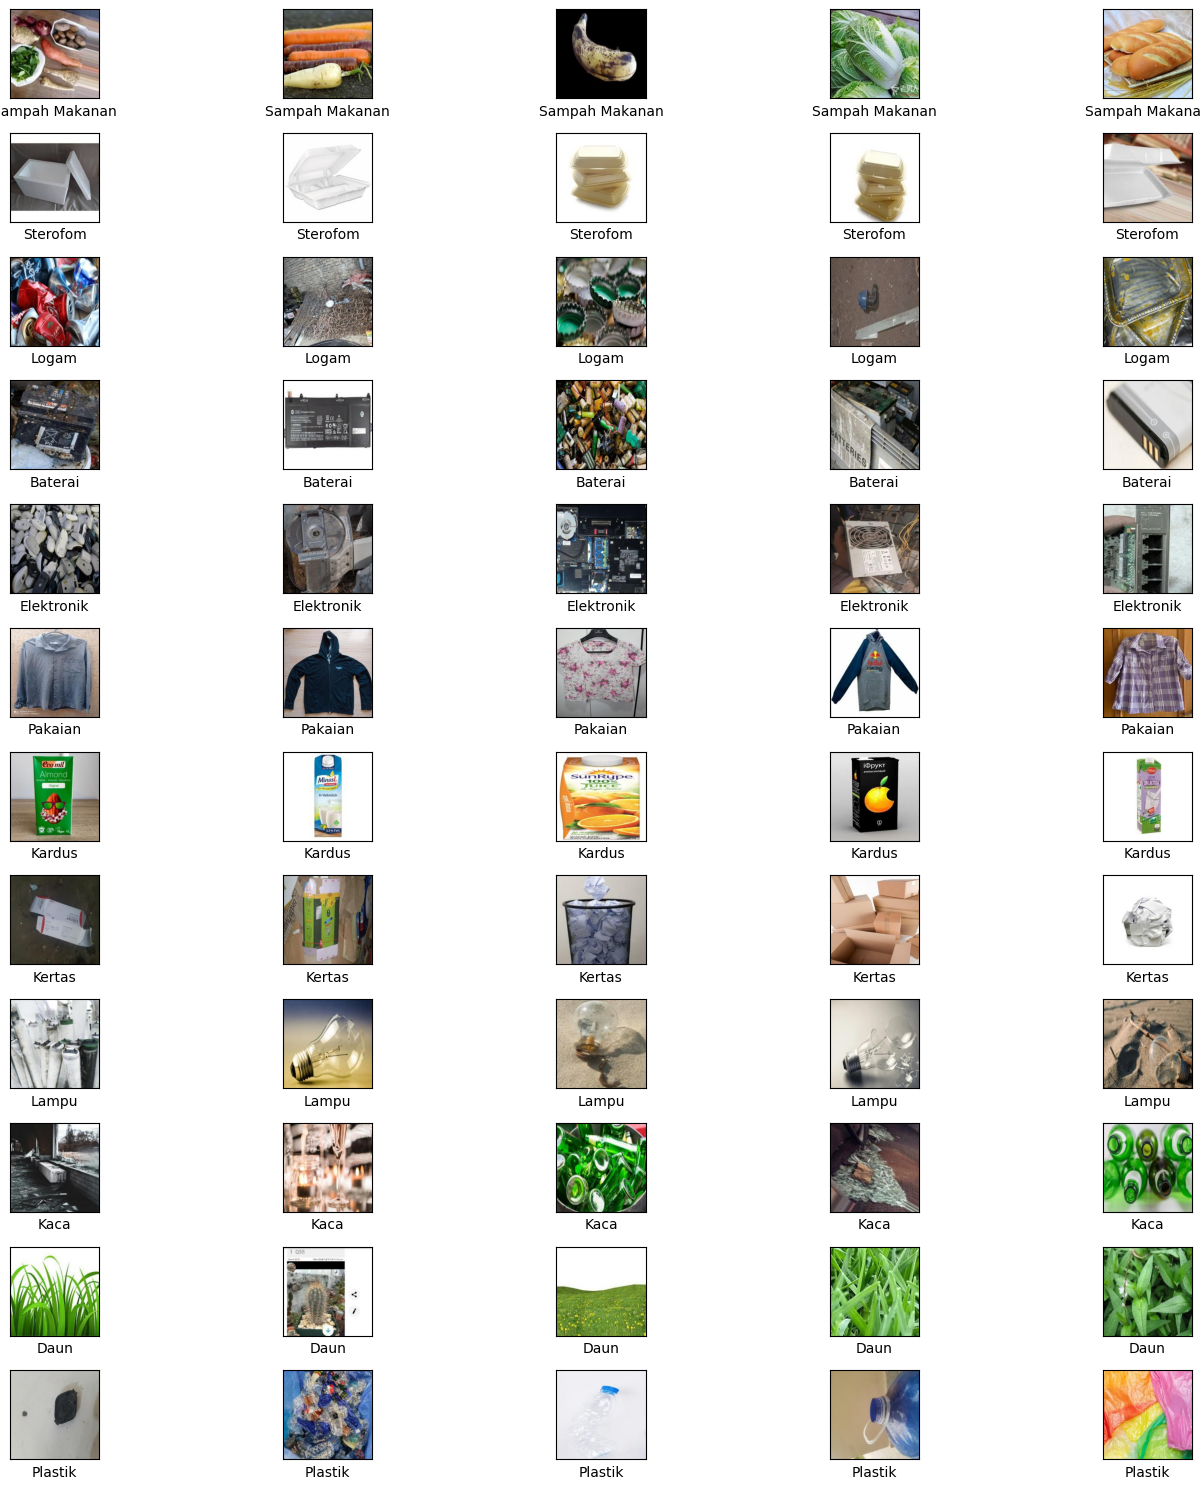

In [24]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
garbage_image_final = {}

# Tentukan path sumber dataset
path = "/content/data_final"
path_sub = os.path.join(path)

# Menyimpan gambar dalam kamus berdasarkan kategori
for category in os.listdir(path_sub):
    garbage_image_final[category] = os.listdir(os.path.join(path_sub, category))

# Menampilkan secara acak 5 gambar di bawah setiap kelas
fig, axs = plt.subplots(len(garbage_image_final.keys()), 5, figsize=(15, 15))

for i, category_name in enumerate(garbage_image_final.keys()):
    images = np.random.choice(garbage_image_final[category_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, category_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=category_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()

## Pembagian Dataset

In [25]:
data_final_split = '/content/data_final_split'

# Membuat folder data_final_split
os.makedirs(data_final_split, exist_ok=True)

In [26]:
# Pembagian dataset menjadi training, validation, dan test
split_dataset(source_dir=target_dir, target_dir=data_final_split, categories=categories)

Pembagian dataset selesai: Training, Validation, dan Test.


In [27]:
for split in ['train', 'val', 'test']:
    for cat in categories:
        folder = os.path.join(data_final_split, split, cat)
        count = len(os.listdir(folder))
        print(f"{split}/{cat}: {count} gambar")

train/Baterai: 1050 gambar
train/Plastik: 1050 gambar
train/Lampu: 1050 gambar
train/Sterofom: 1050 gambar
train/Kaca: 1050 gambar
train/Pakaian: 1050 gambar
train/Logam: 1050 gambar
train/Sampah Makanan: 1050 gambar
train/Elektronik: 1050 gambar
train/Kertas: 1050 gambar
train/Daun: 1050 gambar
train/Kardus: 1050 gambar
val/Baterai: 225 gambar
val/Plastik: 225 gambar
val/Lampu: 225 gambar
val/Sterofom: 225 gambar
val/Kaca: 225 gambar
val/Pakaian: 225 gambar
val/Logam: 225 gambar
val/Sampah Makanan: 225 gambar
val/Elektronik: 225 gambar
val/Kertas: 225 gambar
val/Daun: 225 gambar
val/Kardus: 225 gambar
test/Baterai: 225 gambar
test/Plastik: 225 gambar
test/Lampu: 225 gambar
test/Sterofom: 225 gambar
test/Kaca: 225 gambar
test/Pakaian: 225 gambar
test/Logam: 225 gambar
test/Sampah Makanan: 225 gambar
test/Elektronik: 225 gambar
test/Kertas: 225 gambar
test/Daun: 225 gambar
test/Kardus: 225 gambar


# **Modeling**

## 1. Import Libraries

In [28]:
# Built-in dan library dasar
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Scikit-learn untuk evaluasi
from sklearn.metrics import classification_report, confusion_matrix

# Seaborn untuk heatmap
import seaborn as sns

## 2. Mengambil path dataset

In [29]:
train_dir = '/content/data_final_split/train'
val_dir = '/content/data_final_split/val'
test_dir = '/content/data_final_split/test'

## 3. Menerapkan set seed agar hasil konsisten

In [30]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seed(42)

## 4. Data generators

In [31]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=20.0,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

## 5. Cek jumlah kelas dari generator

In [32]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

num_classes = train_gen.num_classes # Mendapatkan informasi jumlah kelas yang ada

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 12600 images belonging to 12 classes.
Found 2700 images belonging to 12 classes.
Found 2700 images belonging to 12 classes.


In [33]:
# Mengetahui banyaknya kelas dan kode pada setiap kelas
print(f"Jumlah kelas yang terdeteksi oleh generator: {num_classes}")
print(f"Mapping kelas ke indeks: {train_gen.class_indices}")

Jumlah kelas yang terdeteksi oleh generator: 12
Mapping kelas ke indeks: {'Baterai': 0, 'Daun': 1, 'Elektronik': 2, 'Kaca': 3, 'Kardus': 4, 'Kertas': 5, 'Lampu': 6, 'Logam': 7, 'Pakaian': 8, 'Plastik': 9, 'Sampah Makanan': 10, 'Sterofom': 11}


## 6. Membangun model EfficientNetB0 dengan modifikasi Conv2D dan MaxPooling2D + Training

In [34]:
# Load base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Membangun mode
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)

# Menambahkan Conv2D + MaxPooling setelah pretrained model
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile awal (head training)
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

callbacks = [early_stop, reduce_lr, checkpoint]

# Train head saja
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)

# Fine-tuning EfficientNet
base_model.trainable = True
for layer in base_model.layers[:50]:
    layer.trainable = False

# Compile lagi dengan learning rate kecil
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Melanjutkan training
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=callbacks
)

# Menggabungkan hasil training
def combine_history(h1, h2):
    history = {}
    for key in h1.history:
        history[key] = h1.history[key] + h2.history[key]
    return history

full_history = combine_history(history1, history2)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6277 - loss: 1.2551
Epoch 1: val_accuracy improved from -inf to 0.85333, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 230s 519ms/step - accuracy: 0.6279 - loss: 1.2544 - val_accuracy: 0.8533 - val_loss: 0.4642 - learning_rate: 0.0010
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.7881 - loss: 0.6757
Epoch 2: val_accuracy improved from 0.85333 to 0.86630, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 222s 453ms/step - accuracy: 0.7880 - loss: 0.6757 - val_accuracy: 0.8663 - val_loss: 0.4187 - learning_rate: 0.0010
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.8066 - loss: 0.6052
Epoch 3: val_accuracy did not improve from 0.86630
394/394 ━━━━━━━━━━━━━━━━━━━━ 199s 446ms/step - accuracy: 0.8067 - loss: 0.6052 - val_accuracy: 0.8626 - val_loss: 0.4542 - learning_rate: 0.0010
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8260 - loss: 0.5529
Epoch 4: val_accuracy improved from 0.86630 to 0.86741, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 204s 450ms/step - accuracy: 0.8260 - loss: 0.5529 - val_accuracy: 0.8674 - val_loss: 0.4216 - learning_rate: 0.0010
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8402 - loss: 0.4920
Epoch 5: val_accuracy improved from 0.86741 to 0.88222, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 178s 452ms/step - accuracy: 0.8402 - loss: 0.4920 - val_accuracy: 0.8822 - val_loss: 0.4098 - learning_rate: 0.0010
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8475 - loss: 0.4759
Epoch 6: val_accuracy improved from 0.88222 to 0.88778, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 179s 454ms/step - accuracy: 0.8475 - loss: 0.4759 - val_accuracy: 0.8878 - val_loss: 0.3957 - learning_rate: 0.0010
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8567 - loss: 0.4478
Epoch 7: val_accuracy improved from 0.88778 to 0.88889, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 179s 454ms/step - accuracy: 0.8567 - loss: 0.4478 - val_accuracy: 0.8889 - val_loss: 0.3837 - learning_rate: 0.0010
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.8547 - loss: 0.4361
Epoch 8: val_accuracy improved from 0.88889 to 0.89185, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 178s 451ms/step - accuracy: 0.8547 - loss: 0.4361 - val_accuracy: 0.8919 - val_loss: 0.3876 - learning_rate: 0.0010
Epoch 9/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.8615 - loss: 0.4181
Epoch 9: val_accuracy improved from 0.89185 to 0.90037, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 179s 454ms/step - accuracy: 0.8615 - loss: 0.4181 - val_accuracy: 0.9004 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 10/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8668 - loss: 0.4061
Epoch 10: val_accuracy improved from 0.90037 to 0.90704, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 209s 471ms/step - accuracy: 0.8668 - loss: 0.4061 - val_accuracy: 0.9070 - val_loss: 0.3490 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 10.
Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.5743 - loss: 2.9258
Epoch 1: val_accuracy did not improve from 0.90704
394/394 ━━━━━━━━━━━━━━━━━━━━ 293s 578ms/step - accuracy: 0.5744 - loss: 2.9244 - val_accuracy: 0.8222 - val_loss: 0.8087 - learning_rate: 1.0000e-05
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6944 - loss: 1.5258
Epoch 2: val_accuracy did not improve from 0.90704
394/394 ━━━━━━━━━━━━━━━━━━━━ 187s 475ms/step - accuracy: 0.6944 - loss: 1.5256 - val_accuracy: 0.8452 - val_loss: 0.6940 - learning_rate: 1.0000e-05
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.7217 - loss: 1.2331
Epoch 3: val_accuracy did not improve from 0.90704
394/394 ━━━━━━━━━━━━━━━━━━━━ 184s 467ms/step - accuracy: 0.7218 - loss: 1.2330 -

394/394 ━━━━━━━━━━━━━━━━━━━━ 183s 464ms/step - accuracy: 0.8723 - loss: 0.3950 - val_accuracy: 0.9081 - val_loss: 0.3489 - learning_rate: 1.0000e-05
Epoch 23/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8776 - loss: 0.3752
Epoch 23: val_accuracy improved from 0.90815 to 0.91037, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 185s 470ms/step - accuracy: 0.8776 - loss: 0.3752 - val_accuracy: 0.9104 - val_loss: 0.3385 - learning_rate: 1.0000e-05
Epoch 24/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8811 - loss: 0.3662
Epoch 24: val_accuracy improved from 0.91037 to 0.91074, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 183s 465ms/step - accuracy: 0.8811 - loss: 0.3662 - val_accuracy: 0.9107 - val_loss: 0.3401 - learning_rate: 1.0000e-05
Epoch 25/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8826 - loss: 0.3573
Epoch 25: val_accuracy did not improve from 0.91074
394/394 ━━━━━━━━━━━━━━━━━━━━ 183s 465ms/step - accuracy: 0.8827 - loss: 0.3573 - val_accuracy: 0.9096 - val_loss: 0.3386 - learning_rate: 1.0000e-05
Epoch 26/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8935 - loss: 0.3227
Epoch 26: val_accuracy improved from 0.91074 to 0.91333, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 183s 465ms/step - accuracy: 0.8934 - loss: 0.3227 - val_accuracy: 0.9133 - val_loss: 0.3388 - learning_rate: 1.0000e-05
Epoch 27/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8888 - loss: 0.3282
Epoch 27: val_accuracy did not improve from 0.91333
394/394 ━━━━━━━━━━━━━━━━━━━━ 185s 468ms/step - accuracy: 0.8888 - loss: 0.3282 - val_accuracy: 0.9119 - val_loss: 0.3358 - learning_rate: 1.0000e-05
Epoch 28/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.8899 - loss: 0.3224
Epoch 28: val_accuracy did not improve from 0.91333
394/394 ━━━━━━━━━━━━━━━━━━━━ 183s 465ms/step - accuracy: 0.8899 - loss: 0.3224 - val_accuracy: 0.9126 - val_loss: 0.3327 - learning_rate: 1.0000e-05
Epoch 29/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.8990 - loss: 0.3190
Epoch 29: val_accuracy improved from 0.91333 to 0.91370, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 182s 463ms/step - accuracy: 0.8989 - loss: 0.3190 - val_accuracy: 0.9137 - val_loss: 0.3274 - learning_rate: 1.0000e-05
Epoch 30/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8906 - loss: 0.3352
Epoch 30: val_accuracy improved from 0.91370 to 0.91519, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 459ms/step - accuracy: 0.8906 - loss: 0.3352 - val_accuracy: 0.9152 - val_loss: 0.3271 - learning_rate: 1.0000e-05
Epoch 31/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.9030 - loss: 0.3036
Epoch 31: val_accuracy did not improve from 0.91519
394/394 ━━━━━━━━━━━━━━━━━━━━ 182s 462ms/step - accuracy: 0.9030 - loss: 0.3036 - val_accuracy: 0.9152 - val_loss: 0.3198 - learning_rate: 1.0000e-05
Epoch 32/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9024 - loss: 0.2971
Epoch 32: val_accuracy did not improve from 0.91519
394/394 ━━━━━━━━━━━━━━━━━━━━ 182s 463ms/step - accuracy: 0.9024 - loss: 0.2972 - val_accuracy: 0.9133 - val_loss: 0.3224 - learning_rate: 1.0000e-05
Epoch 33/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9030 - loss: 0.2852
Epoch 33: val_accuracy improved from 0.91519 to 0.91556, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 180s 456ms/step - accuracy: 0.9030 - loss: 0.2852 - val_accuracy: 0.9156 - val_loss: 0.3198 - learning_rate: 1.0000e-05
Epoch 34/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9069 - loss: 0.2747
Epoch 34: val_accuracy did not improve from 0.91556
394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 459ms/step - accuracy: 0.9069 - loss: 0.2747 - val_accuracy: 0.9156 - val_loss: 0.3174 - learning_rate: 1.0000e-05
Epoch 35/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9082 - loss: 0.2902
Epoch 35: val_accuracy improved from 0.91556 to 0.91704, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 460ms/step - accuracy: 0.9082 - loss: 0.2902 - val_accuracy: 0.9170 - val_loss: 0.3184 - learning_rate: 1.0000e-05
Epoch 36/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9133 - loss: 0.2598
Epoch 36: val_accuracy improved from 0.91704 to 0.91778, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 180s 457ms/step - accuracy: 0.9133 - loss: 0.2598 - val_accuracy: 0.9178 - val_loss: 0.3154 - learning_rate: 1.0000e-05
Epoch 37/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9103 - loss: 0.2691
Epoch 37: val_accuracy did not improve from 0.91778
394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 460ms/step - accuracy: 0.9103 - loss: 0.2691 - val_accuracy: 0.9178 - val_loss: 0.3143 - learning_rate: 1.0000e-05
Epoch 38/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.9076 - loss: 0.2686
Epoch 38: val_accuracy did not improve from 0.91778
394/394 ━━━━━━━━━━━━━━━━━━━━ 183s 466ms/step - accuracy: 0.9076 - loss: 0.2686 - val_accuracy: 0.9163 - val_loss: 0.3124 - learning_rate: 1.0000e-05
Epoch 39/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9123 - loss: 0.2737
Epoch 39: val_accuracy did not improve from 0.91778
394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 458ms/step - accuracy: 0.9123 - loss: 0.2736 - val_accuracy: 0.9167 - val_loss: 0.3129 - learnin

394/394 ━━━━━━━━━━━━━━━━━━━━ 182s 463ms/step - accuracy: 0.9135 - loss: 0.2529 - val_accuracy: 0.9185 - val_loss: 0.3096 - learning_rate: 1.0000e-05
Epoch 41/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9091 - loss: 0.2558
Epoch 41: val_accuracy did not improve from 0.91852
394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 458ms/step - accuracy: 0.9091 - loss: 0.2558 - val_accuracy: 0.9174 - val_loss: 0.3090 - learning_rate: 1.0000e-05
Epoch 42/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.9230 - loss: 0.2409
Epoch 42: val_accuracy improved from 0.91852 to 0.91889, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 184s 466ms/step - accuracy: 0.9230 - loss: 0.2409 - val_accuracy: 0.9189 - val_loss: 0.3110 - learning_rate: 1.0000e-05
Epoch 43/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.9182 - loss: 0.2474
Epoch 43: val_accuracy improved from 0.91889 to 0.91963, saving model to best_model.h5


394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 459ms/step - accuracy: 0.9182 - loss: 0.2474 - val_accuracy: 0.9196 - val_loss: 0.3198 - learning_rate: 1.0000e-05
Epoch 44/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9188 - loss: 0.2360
Epoch 44: val_accuracy did not improve from 0.91963
394/394 ━━━━━━━━━━━━━━━━━━━━ 179s 455ms/step - accuracy: 0.9188 - loss: 0.2360 - val_accuracy: 0.9163 - val_loss: 0.3188 - learning_rate: 1.0000e-05
Epoch 45/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.9177 - loss: 0.2343
Epoch 45: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.

Epoch 45: val_accuracy did not improve from 0.91963
394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 459ms/step - accuracy: 0.9177 - loss: 0.2343 - val_accuracy: 0.9181 - val_loss: 0.3119 - learning_rate: 1.0000e-05
Epoch 46/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9260 - loss: 0.2309
Epoch 46: val_accuracy did not improve from 0.91963
394/394 ━━━━━━━━━━━━━━━━━━━━ 181s 459ms/step - accu

## 7. Load bobot terbaik

In [35]:
model.load_weights('best_model.h5')

## 8. Visualisasi plot akurasi dan loss training

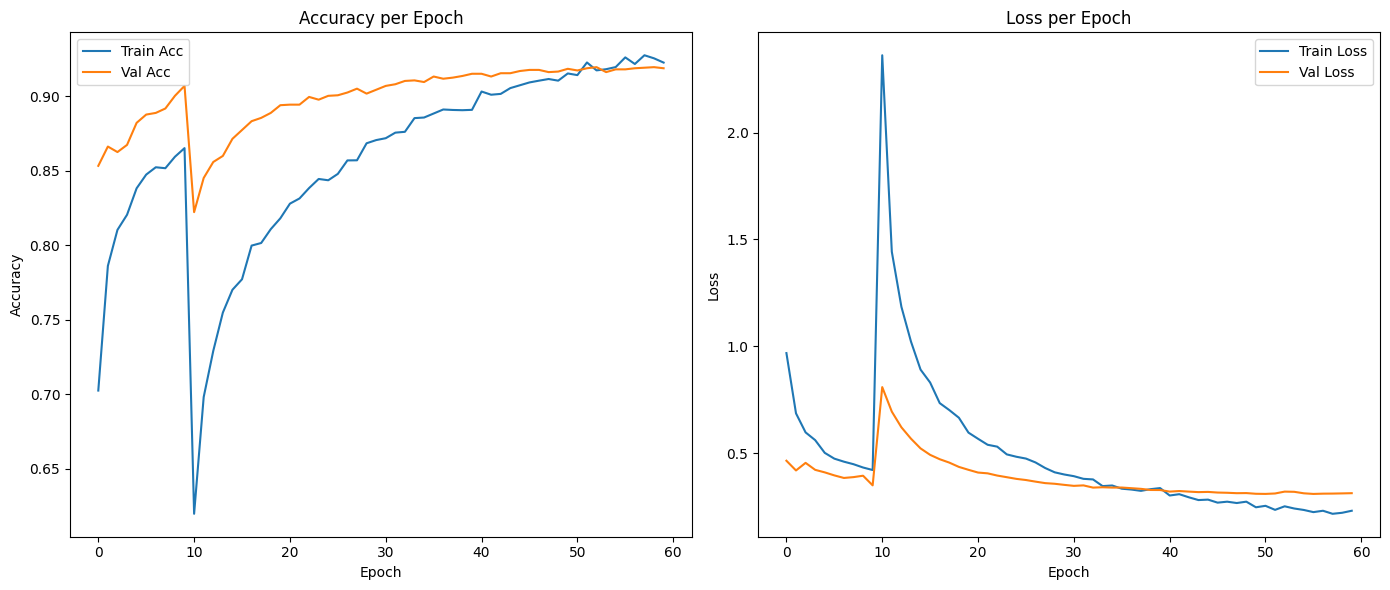

In [36]:
# Plot hasil training
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(full_history['accuracy'], label='Train Acc')
plt.plot(full_history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(full_history['loss'], label='Train Loss')
plt.plot(full_history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 9. Evaluasi pada data test

In [37]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9263 - loss: 0.3093
Test Accuracy: 0.9222
Test Loss: 0.3001


## 10. Prediksi pada setiap kelas

In [38]:
pred_probs = model.predict(test_gen, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step


## 11. Classification Report

In [39]:
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
                precision    recall  f1-score   support

       Baterai       0.96      0.91      0.93       225
          Daun       0.96      0.98      0.97       225
    Elektronik       0.85      0.91      0.88       225
          Kaca       0.89      0.93      0.91       225
        Kardus       0.93      0.96      0.95       225
        Kertas       0.86      0.84      0.85       225
         Lampu       1.00      0.94      0.97       225
         Logam       0.84      0.88      0.86       225
       Pakaian       0.99      0.99      0.99       225
       Plastik       0.85      0.78      0.81       225
Sampah Makanan       0.98      0.95      0.96       225
      Sterofom       0.97      1.00      0.99       225

      accuracy                           0.92      2700
     macro avg       0.92      0.92      0.92      2700
  weighted avg       0.92      0.92      0.92      2700



## 12. Confusion Matrix

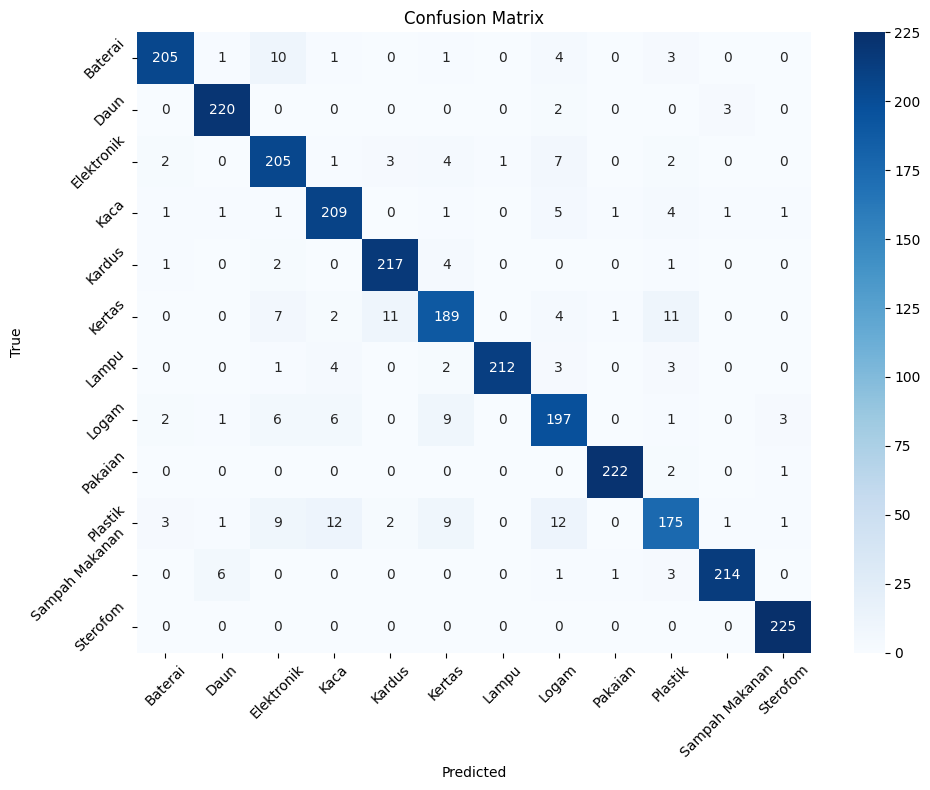

In [40]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# **Inference**

## 1. Import Libraries

In [41]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import os
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

!pip install gdown
import gdown

## 2. Load model hasil training

In [42]:
model = load_model('best_model.h5')

## 3. Mengelompokkan Kelas ke dalam Grup

In [43]:
class_names = [
    'Baterai', 'Daun', 'Elektronik', 'Kaca', 'Kardus',
    'Kertas', 'Lampu', 'Logam', 'Pakaian',
    'Plastik', 'Sampah Makanan', 'Sterofom'
]

group_map = {
    'Logam': 'Anorganik',
    'Plastik': 'Anorganik',
    'Pakaian': 'Anorganik',
    'Kaca': 'Anorganik',
    'Sterofom': 'Anorganik',
    'Daun': 'Organik',
    'Kardus': 'Organik',
    'Sampah Makanan': 'Organik',
    'Kertas': 'Organik',
    'Baterai': 'B3',
    'Lampu': 'B3',
    'Elektronik': 'B3'
}

## 4. Definisi Fungsi Load dan Prediksi Gambar

In [44]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):
    img_ready = prepare_image(img_path)
    preds = model.predict(img_ready)
    pred_idx = np.argmax(preds, axis=1)[0]
    pred_class = class_names[pred_idx]
    pred_group = group_map.get(pred_class, 'Unknown')
    return pred_class, pred_group

## 5. Upload Gambar untuk prediksi

Saving sampah baterai.jpg to sampah baterai.jpg


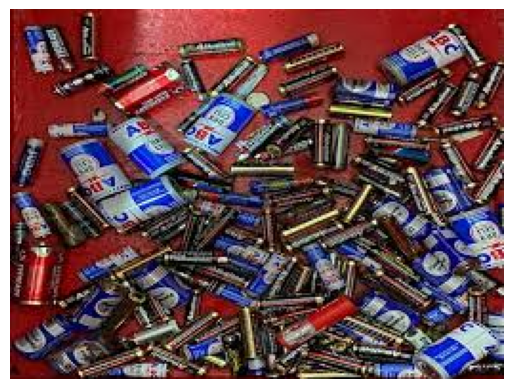

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
sampah baterai.jpg -> Sampah: Baterai, Kategori: B3


In [46]:
uploaded = files.upload()

for filename in uploaded.keys():
    # Preview gambar
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Prediksi
    pred_class, pred_group = predict_image(filename)
    print(f"{filename} -> Sampah: {pred_class}, Kategori: {pred_group}")